# Исследование стартапов

## Введение

**Финансовая компания, которая предоставляет льготные займы стартапам, хочет войти на инвестиционный рынок с прицелом на покупку, развитие и последующую перепродажу перспективных стартапов. Для разработки модели бизнеса нужна информация. Чтобы выработать общее понимание, какие данные могут быть полезны, проводится исследование на исторических данных.**

**Цель проекта:**
- Ответить на вопросы заказчика как о предобработке, так и о значении данных для бизнеса.

**Задачи:**
- Познакомиться с данными;
- Проверить их корректность;
- Провести предобработку,получив необходимый срез данных;
- Подвести итог и выдать рекомендации на основе выполнения вышеопоставленных задач.


## Шаг 1. Знакомство с данными: загрузка и первичная предобработка

***Таблица acquisition***

**`id`** - Идентификатор покупки

**`acquiring_company_id`** -  Идентификатор покупающей компании

**`acquired_company_id`** - Идентификатор покупаемой компании

**`term_code`** - Варианты расчёта

**`price_amount`** - Сумма сделки

**`acquired_at`** - дата сделки

***Таблица company_and_rounds***

**`company_ID`** - Идентификатор компании

**`name`** -  название компании

**`category_code`** - категория области деятельности компании

**`status`** - статус компании

**`founded_at`** - дата инвестирования

**`closed_at`** - дата закрытия компании

**`domain`** - официальный сайт компании

**`network_username`** - ник компании в сети

**`country_code`** - код страны компании

**`investment_rounds`** - число инвестиционных раундов

**`funding_rounds`** - число раундов финансирования

**`funding_total`** - сумма финансирования

**`milestones`** - вехи финансирования

**`funding_round_id`** - идентификатор этапа финансирования

**`company_id`** - идентификатор компании

**`funded_at`** - дата финансирования

**`funding_round_type`** - тип финансирования

**`raised_amount`** - сумма финансирования

**`pre_money_valuation`** - предварительная денежная оценка

**`participants`** - число участников

**`is_first_round`** - является ли раунд первым

**`is_last_round`** - является ли раунд последним

***Таблица education***

**`id`** - идентификатор записи об образовании

**`person_id`** - идентификатор работника

**`instituition`** - название учебного заведения

**`graduated_at`** - дата получения образования

***Таблица people***

**`id`** - идентификатор сотрудника

**`first_name`** - имя сотрудника

**`last_name`** - фамилия сотрудника

**`company_id`** - идентификатор компании

**`network_username`** - ник в социальных сетях

***Таблица degrees***

**`id`** - идентификатор записи

**`object_id`** - идентификатор сотрудника

**`degree_type`** - тип образования

**`subject`** - специальность

***Таблица fund***

**`id`** - идентификатор фонда

**`name`** - название фонда

**`category_code`** - категория области деятельности компании

**`domain`** - сайт фонда

**`network_username`** - ник фонда в сети

**`country_code`** - код страны фонда

**`investment_rounds`** - число инвестиционных раундов

**`invested_companies`** - число профинансированных компаний

**`milestones`** - вехи финансирования

***Таблица investment***

**`id`** - идентификатор этапа инвестирования

**`funding_round_id`** - идентификатор раунда инвестирования.

**`company_id`** - индентификатор компании.

**`funding_round_type`** - тип финансирования.

**`fund_id`** - идентификатор фонда.

Они находятся в папке datasets, если вы выполняете работу на платформе. В случае, если вы делаете работу локально, доступ к файлам в папке можно получить по адресу `https://code.s3.yandex.net/datasets/` + имя файла.

### 1.1. Вывод общей информации, исправление названия столбцов


* Загрузите все данные по проекту.
* Проверьте названия столбцов.
* Выведите информацию, которая необходима вам для принятия решений о предобработке, для каждого из датасетов.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
acquisition = pd.read_csv('https://code.s3.yandex.net/datasets/acquisition.csv')
company_and_rounds = pd.read_csv('https://code.s3.yandex.net/datasets/company_and_rounds.csv')
degrees = pd.read_csv('https://code.s3.yandex.net/datasets/degrees.csv')
education = pd.read_csv('https://code.s3.yandex.net/datasets/education.csv')
fund = pd.read_csv('https://code.s3.yandex.net/datasets/fund.csv')
investment = pd.read_csv('https://code.s3.yandex.net/datasets/investment.csv')
people = pd.read_csv('https://code.s3.yandex.net/datasets/people.csv')

In [3]:
acquisition.info()
acquisition.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    9407 non-null   int64 
 1   acquiring_company_id  9407 non-null   int64 
 2   acquired_company_id   9407 non-null   int64 
 3   term_code             1831 non-null   object
 4   price_amount          9407 non-null   int64 
 5   acquired_at           9378 non-null   object
dtypes: int64(4), object(2)
memory usage: 441.1+ KB


,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,1,11,10,NaN,20000000,2007-05-30
1,7,59,72,cash,60000000,2007-07-01
2,8,24,132,cash,280000000,2007-05-01
3,9,59,155,cash,100000000,2007-06-01
4,10,212,215,cash,25000000,2007-07-01


In [4]:
company_and_rounds.info()
company_and_rounds.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   company  ID            217472 non-null  float64
 1   name                   217471 non-null  object 
 2   category  code         143886 non-null  object 
 3   status                 217472 non-null  object 
 4   founded  at            109956 non-null  object 
 5   closed  at             3449 non-null    object 
 6   domain                 147159 non-null  object 
 7   network  username      95534 non-null   object 
 8   country  code          108607 non-null  object 
 9   investment  rounds     217472 non-null  float64
 10  funding  rounds        217472 non-null  float64
 11  funding  total         217472 non-null  float64
 12  milestones             217472 non-null  float64
 13  funding  round  id     52928 non-null   float64
 14  company  id            52928 non-nul

,company ID,name,category code,status,founded at,closed at,domain,network username,country code,investment rounds,...,milestones,funding round id,company id,funded at,funding round type,raised amount,pre money valuation,participants,is first round,is last round
0,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0
3,10.0,Flektor,games_video,acquired,NaN,NaN,flektor.com,NaN,USA,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100.0,There,games_video,acquired,NaN,NaN,there.com,NaN,USA,0.0,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
degrees.info()
degrees.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           109610 non-null  int64 
 1   object_id    109610 non-null  object
 2   degree_type  98389 non-null   object
 3   subject      81298 non-null   object
dtypes: int64(1), object(3)
memory usage: 3.3+ MB


,id,object_id,degree_type,subject
0,1,p:6117,MBA,NaN
1,2,p:6136,BA,"English, French"
2,3,p:6136,MS,Mass Communication
3,4,p:6005,MS,Internet Technology
4,5,p:5832,BCS,"Computer Science, Psychology"


In [6]:
education.info()
education.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            109610 non-null  int64 
 1   person_id     109610 non-null  int64 
 2   instituition  109555 non-null  object
 3   graduated_at  58054 non-null   object
dtypes: int64(2), object(2)
memory usage: 3.3+ MB


,id,person_id,instituition,graduated_at
0,1,6117,NaN,NaN
1,2,6136,"Washington University, St. Louis",1990-01-01
2,3,6136,Boston University,1992-01-01
3,4,6005,University of Greenwich,2006-01-01
4,5,5832,Rice University,NaN


In [7]:
fund.info()
fund.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11652 entries, 0 to 11651
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  11652 non-null  int64 
 1   name                11649 non-null  object
 2   founded_at          4605 non-null   object
 3   domain              7362 non-null   object
 4   network_username    2149 non-null   object
 5   country_code        7053 non-null   object
 6   investment_rounds   11652 non-null  int64 
 7   invested_companies  11652 non-null  int64 
 8   milestones          11652 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 819.4+ KB


,id,name,founded_at,domain,network_username,country_code,investment_rounds,invested_companies,milestones
0,13131,NaN,NaN,NaN,NaN,NaN,0,0,0
1,1,Greylock Partners,1965-01-01,greylock.com,greylockvc,USA,307,196,0
2,10,Mission Ventures,1996-01-01,missionventures.com,NaN,USA,58,33,0
3,100,"Kapor Enterprises, Inc.",NaN,kei.com,NaN,USA,2,1,0
4,1000,Speed Ventures,NaN,NaN,NaN,NaN,0,0,1


In [8]:
investment.info()
investment.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61403 entries, 0 to 61402
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   id                61403 non-null  int64
 1   funding_round_id  61403 non-null  int64
 2   company_id        61403 non-null  int64
 3   fund_id           61403 non-null  int64
dtypes: int64(4)
memory usage: 1.9 MB


,id,funding_round_id,company_id,fund_id
0,1,1,4,1
1,2,1,4,2
2,3,3,5,4
3,4,4,5,1
4,5,4,5,5


In [9]:
people.info()
people.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226709 entries, 0 to 226708
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                226709 non-null  int64  
 1   first_name        226700 non-null  object 
 2   last_name         226705 non-null  object 
 3   company_id        34615 non-null   float64
 4   network_username  38867 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 8.6+ MB


,id,first_name,last_name,company_id,network_username
0,10,Mark,Zuckerberg,5.0,NaN
1,100,Peter,Lester,27.0,NaN
2,1000,Dr. Steven,E. Saunders,292.0,NaN
3,10000,Neil,Capel,2526.0,NaN
4,100000,Sue,Pilsch,NaN,NaN


<div style="background-color:lavender; color:#black; text-align:left; padding:2%">
    
#### **Комментарий:** Нужно привести в порядок тип даннных во всех таблицах и  названия столбцов в таблице company_and_rounds. Так же заметны пропуски во всех таблицах, кроме investment. В столбцах где указано "_at" тип данных должен быть связан с датой, тут мы видим тип данных "object"
    

### 1.2. Смена типов и анализ пропусков

* Обработайте типы данных в столбцах, которые хранят значения даты и времени, если это необходимо.


* Оцените полноту данных — сделайте предварительный вывод, достаточно ли данных для решения задач проекта.

In [10]:
company_and_rounds.columns = company_and_rounds.columns.str.replace('  ','_')

In [11]:
print('Пропуски в датафрейме acquisition')
missing_acquisition_abs = acquisition.isna().sum()
missing_acquisition_sorted = missing_acquisition_abs.sort_values(ascending=False)
missin_acquisition_perc = (missing_acquisition_sorted / len(acquisition))*100
styled_acquisition = pd.DataFrame({
    'Количество пропусков': missing_acquisition_sorted, 
    'Процент пропусков': missin_acquisition_perc
}).style.background_gradient(cmap='crest', axis=0)
styled_acquisition

Пропуски в датафрейме acquisition


,Количество пропусков,Процент пропусков
term_code,7576,80.535771
acquired_at,29,0.308281
id,0,0.000000
acquiring_company_id,0,0.000000
acquired_company_id,0,0.000000
price_amount,0,0.000000


In [12]:
print('Пропуски в датафрейме company_and_rounds')
missing_company_and_rounds_abs = company_and_rounds.isna().sum()
missing_company_and_rounds_sorted = missing_company_and_rounds_abs.sort_values(ascending=False)
missing_company_and_rounds_perc = (missing_company_and_rounds_sorted / len(company_and_rounds))*100
styled_company_and_rounds = pd.DataFrame({
    'Количество пропусков': missing_company_and_rounds_sorted, 
    'Процент пропусков': missing_company_and_rounds_perc
}).style.background_gradient(cmap='crest', axis=0)
styled_company_and_rounds

Пропуски в датафрейме company_and_rounds


,Количество пропусков,Процент пропусков
closed_at,214325,98.416248
funded_at,165094,75.809784
is_last_round,164846,75.695905
funding_round_type,164846,75.695905
is_first_round,164846,75.695905
participants,164846,75.695905
pre_money_valuation,164846,75.695905
raised_amount,164846,75.695905
funding_round_id,164846,75.695905
company_id,164846,75.695905


In [13]:
print('Пропуски в датафрейме degrees')
missing_degrees_abs = degrees.isna().sum()
missing_degrees_sorted = missing_degrees_abs.sort_values(ascending=False)
missing_degrees_perc = (missing_degrees_sorted / len(degrees))*100
styled_degrees = pd.DataFrame({
    'Количество пропусков': missing_degrees_sorted, 
    'Процент пропусков': missing_degrees_perc
}).style.background_gradient(cmap='crest', axis=0)
styled_degrees

Пропуски в датафрейме degrees


,Количество пропусков,Процент пропусков
subject,28312,25.829760
degree_type,11221,10.237205
id,0,0.000000
object_id,0,0.000000


In [14]:
print('Пропуски в датафрейме education')
missing_education_abs = education.isna().sum()
missing_education_sorted = missing_education_abs.sort_values(ascending=False)
missing_education_perc = (missing_education_sorted / len(education))*100
styled_education = pd.DataFrame({
    'Количество пропусков': missing_education_sorted, 
    'Процент пропусков': missing_education_perc
}).style.background_gradient(cmap='crest', axis=0)
styled_education

Пропуски в датафрейме education


,Количество пропусков,Процент пропусков
graduated_at,51556,47.035854
instituition,55,0.050178
id,0,0.000000
person_id,0,0.000000


In [15]:
print('Пропуски в датафрейме fund')
missing_fund_abs = fund.isna().sum()
missing_fund_sorted = missing_fund_abs.sort_values(ascending=False)
missing_fund_perc = (missing_fund_sorted / len(fund))*100
styled_fund = pd.DataFrame({
    'Количество пропусков': missing_fund_sorted, 
    'Процент пропусков': missing_fund_perc
}).style.background_gradient(cmap='crest', axis=0)
styled_fund

Пропуски в датафрейме fund


,Количество пропусков,Процент пропусков
network_username,9503,81.556814
founded_at,7047,60.478888
country_code,4599,39.469619
domain,4290,36.817714
name,3,0.025747
id,0,0.000000
investment_rounds,0,0.000000
invested_companies,0,0.000000
milestones,0,0.000000


In [16]:
print('Пропуски в датафрейме investment')
missing_investment_abs = investment.isna().sum()
missing_investment_sorted = missing_investment_abs.sort_values(ascending=False)
missing_investment_perc = (missing_investment_sorted / len(investment))*100
styled_investment = pd.DataFrame({
    'Количество пропусков': missing_investment_sorted, 
    'Процент пропусков': missing_investment_perc
}).style.background_gradient(cmap='crest', axis=0)
styled_investment

Пропуски в датафрейме investment


,Количество пропусков,Процент пропусков
id,0,0.000000
funding_round_id,0,0.000000
company_id,0,0.000000
fund_id,0,0.000000


In [17]:
print('Пропуски в датафрейме people')
missing_people_abs = people.isna().sum()
missing_people_sorted = missing_people_abs.sort_values(ascending=False)
missing_people_perc = (missing_people_sorted / len(people))*100
styled_people = pd.DataFrame({
    'Количество пропусков': missing_people_sorted, 
    'Процент пропусков': missing_people_perc
}).style.background_gradient(cmap='crest', axis=0)
styled_people

Пропуски в датафрейме people


,Количество пропусков,Процент пропусков
company_id,192094,84.731528
network_username,187842,82.855996
first_name,9,0.003970
last_name,4,0.001764
id,0,0.000000


In [18]:
# Функции, которые автоматически подбирают нужный числовой тип данных и заменяют его
def optimize_memory_usage(x: pd.DataFrame, print_size: bool=True) -> pd.DataFrame:
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64'] 
    # Размер занимаемой памяти до оптимизации (в Мб)
    before_size = x.memory_usage().sum() / 1024**2    
    for column in x.columns:
        column_type = x[column].dtypes
        if column_type in numerics:
            column_min = x[column].min()
            column_max = x[column].max()
            if str(column_type).startswith('int'):
                if column_min > np.iinfo(np.int8).min and column_max < np.iinfo(np.int8).max:
                    x[column] = x[column].astype(np.int8)
                elif column_min > np.iinfo(np.int16).min and column_max < np.iinfo(np.int16).max:
                    x[column] = x[column].astype(np.int16)
                elif column_min > np.iinfo(np.int32).min and column_max < np.iinfo(np.int32).max:
                    x[column] = x[column].astype(np.int32)
                elif column_min > np.iinfo(np.int64).min and column_max < np.iinfo(np.int64).max:
                    x[column] = x[column].astype(np.int64)  
            else:
                if column_min > np.finfo(np.float32).min and column_max < np.finfo(np.float32).max:
                    x[column] = x[column].astype(np.float32)
                else:
                    x[column] = x[column].astype(np.float64)    
    # Размер занимаемой памяти после оптимизации (в Мб)
    after_size = x.memory_usage().sum() / 1024**2
    if print_size: print('Размер использования памяти: до {:5.2f} Mb - после {:5.2f} Mb ({:.1f}%)'
                         .format(before_size, after_size, 100 * (before_size - after_size) / before_size))
    return x

In [19]:
# Применим функцию к каждому датафрейму и проверим информацию о каждом датасете
datasets = [acquisition,company_and_rounds,degrees,education,fund,investment,people]
for i, dataset in enumerate(datasets):
    datasets[i] = optimize_memory_usage(dataset)
    datasets[i].info()
    print("\n")

Размер использования памяти: до  0.43 Mb - после  0.31 Mb (29.2%)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    9407 non-null   int16 
 1   acquiring_company_id  9407 non-null   int32 
 2   acquired_company_id   9407 non-null   int32 
 3   term_code             1831 non-null   object
 4   price_amount          9407 non-null   int64 
 5   acquired_at           9378 non-null   object
dtypes: int16(1), int32(2), int64(1), object(2)
memory usage: 312.5+ KB


Размер использования памяти: до 36.55 Mb - после 26.58 Mb (27.3%)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   company_ID           217472 non-null  float32
 1   name               

In [20]:
# Преобразуем столбцы с датами в тип datetime
acquisition['acquired_at'] = pd.to_datetime(acquisition['acquired_at'],errors = 'coerce')
company_and_rounds['founded_at'] = pd.to_datetime(company_and_rounds['founded_at'],errors = 'coerce')
company_and_rounds['closed_at'] = pd.to_datetime(company_and_rounds['closed_at'],errors = 'coerce')
company_and_rounds['funded_at'] = pd.to_datetime(company_and_rounds['funded_at'],errors = 'coerce')
education['graduated_at'] = pd.to_datetime(education['graduated_at'],errors = 'coerce')
fund['founded_at'] = pd.to_datetime(fund['founded_at'],errors = 'coerce')

# Проверим информацию о каждом датасете
acquisition.info()
company_and_rounds.info()
education.info()
fund.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    9407 non-null   int16         
 1   acquiring_company_id  9407 non-null   int32         
 2   acquired_company_id   9407 non-null   int32         
 3   term_code             1831 non-null   object        
 4   price_amount          9407 non-null   int64         
 5   acquired_at           9378 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int16(1), int32(2), int64(1), object(1)
memory usage: 312.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   company_ID           217472 non-null  float32       
 1   name                 217471 non-null  object     

<div style="background-color:lavender; color:#black; text-align:left; padding:2%">
    
#### **Комментарий:** Тут я сначала изменил названия столбцов в таблице company_and_rounds, потому что в остальных датасетах, стобцы указаны через "_", а в этой таблице там используется двойной пробел, поэтому для дальнейшего удобного анализа данных, я заменил пробелы на нижнее подчеркивание. Так же я вывел информацию о пропусках во всех таблицах, где сразу бросается в глаза та же таблица company_and_rounds, в которой 12 столбцов имеют выше 50 % пропусков. Еще решил изменить здесь тип данных у числовых стобцов, ранее я использовал данную функцию, которая автоматически определяет нужный размер типа данных и заменяет его. Данный код мне посоветовал использовать ревьюер, которые ранее проверял мои прошлые проекты. Был изменен тип данных столбцов, где хранилась информация о дате, ранее они были указаны в типе данных, как 'object'. 

## Шаг 2. Предобработка данных, предварительное исследование


### 2.1. Раунды финансирования по годам

Задание необходимо выполнить без объединения и дополнительной предобработки на основе датасета `company_and_rounds.csv`.

* Составьте сводную таблицу по годам, в которой на основании столбца `raised_amount` для каждого года указан:

  * типичный размер средств, выделяемый в рамках одного раунда;
  * общее количество раундов финансирования за этот год.

* Оставьте в таблице информацию только для тех лет, для которых есть информация о более чем 50 раундах финансирования.

* На основе получившейся таблицы постройте график, который будет отражать динамику типичного размера средств, которые стартапы получали в рамках одного раунда финансирования.

На основе полученных данных ответьте на вопросы:

* В каком году типичный размер собранных в рамках одного раунда средств был максимален?

* Какая тенденция по количеству раундов и выделяемых в рамках каждого раунда средств наблюдалась в 2013 году?

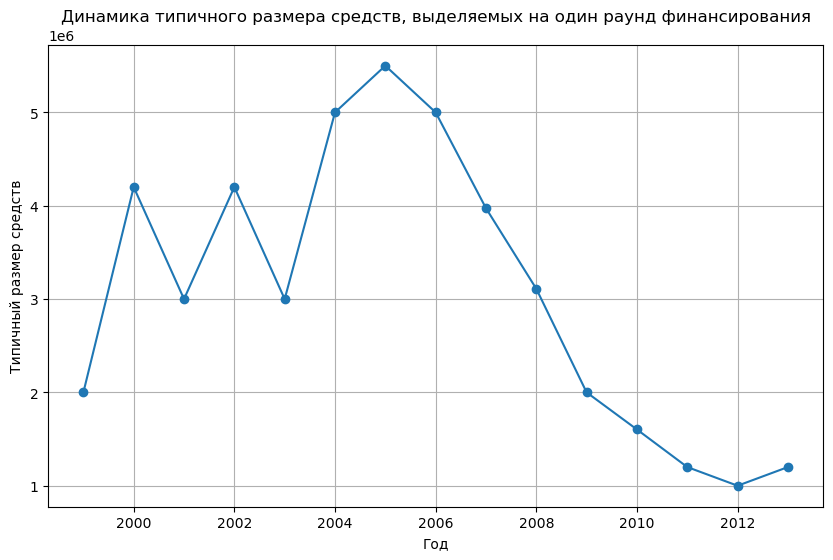

Год с максимальным типичным размером средств: 2005.0
Для 2013 года:
Выделенные средства: 1200000.0
Кол-во раундов: 11072.0


In [21]:
# Преобразуем данные по годам
company_and_rounds['year'] = company_and_rounds['funded_at'].dt.year
# Создадим сводную таблицу
rounds_per_year = company_and_rounds.groupby('year').agg(
    typical_round_size=('raised_amount', 'median'),
    total_rounds=('raised_amount', 'count')
)
# Оставим только годы с более чем 50 раундами
rounds_per_year_filtered = rounds_per_year[rounds_per_year['total_rounds'] > 50]
# Построим график
plt.figure(figsize=(10, 6))
plt.plot(rounds_per_year_filtered.index, rounds_per_year_filtered['typical_round_size'], marker='o')
plt.title('Динамика типичного размера средств, выделяемых на один раунд финансирования')
plt.xlabel('Год')
plt.ylabel('Типичный размер средств')
plt.grid(True)
plt.show()
# Ответим на вопросы:
max_round_year = rounds_per_year_filtered['typical_round_size'].idxmax()
print(f'Год с максимальным типичным размером средств: {max_round_year}')
round_2013 = rounds_per_year_filtered.loc[2013]
print(f"Для 2013 года:\nВыделенные средства: {round_2013['typical_round_size']}\nКол-во раундов: {round_2013['total_rounds']}")

<div style="background-color:lavender; color:#black; text-align:left; padding:2%">
    
#### **Комментарий:** В целом, выше видно нужный график, который показывает динамику средств, и так же есть ответы на вопросы. Тут мы видим, что в период с 2000 по 2003 года размер выделенных средств колеблтся, но после 2003 года, в промежуток с 2004 по 2006 года, мы можем видеть самые крупные выделенные средства, а в оставшиеся года все идет на спад, следующее повышение средстав произошло в 2013 году. А саму тендецию спада можно охаректирозовать, что начала вкладывать средства даже в самые малые бизнесы, и так как они малые, средст не будет выделятся очень много, поэтому и спад начал происходить


### 2.2. Люди и их образование

Заказчик хочет понять, зависит ли полнота сведений о сотрудниках (например, об их образовании) от размера компаний.

* Оцените, насколько информация об образовании сотрудников полна. Используя датасеты `people.csv` и `education.csv`, разделите все компании на несколько групп по количеству сотрудников и оцените среднюю долю сотрудников без информации об образовании в каждой из групп. Обоснуйте выбранные границы групп.

* Оцените, возможно ли для выполнения задания присоединить к этим таблицам ещё и таблицу `degrees.csv`.

,id,first_name,last_name,company_id,network_username,id_degree,instituition,graduated_at
0,10,Mark,Zuckerberg,5.0,NaN,2415.0,Harvard University,NaT
1,100,Peter,Lester,27.0,NaN,NaN,NaN,NaT
2,1000,Dr. Steven,E. Saunders,292.0,NaN,NaN,NaN,NaT
3,10000,Neil,Capel,2526.0,NaN,NaN,NaN,NaT
4,100000,Sue,Pilsch,NaN,NaN,NaN,NaN,NaT
...,...,...,...,...,...,...,...,...
267689,99999,Ramon,Peypoch,NaN,NaN,NaN,NaN,NaT
267690,174088,Dr. Ray,Woods,188200.0,network,25958.0,Sydney University Medical School,1982-01-01
267691,118386,Ricardo,Durand,143419.0,itechsocialnet,18871.0,ESCS,2004-01-01
267692,175827,mahesh,kumar,NaN,socialnethubs,NaN,NaN,NaT


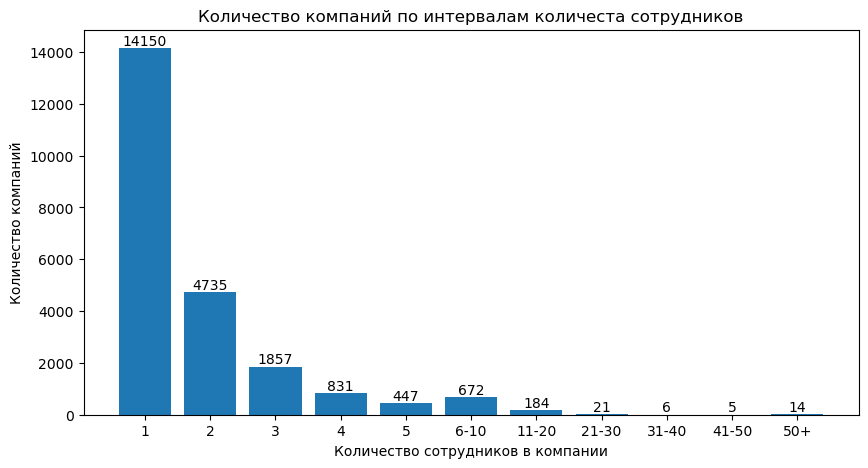

In [22]:
people_education = people.merge(education, left_on='id', right_on='person_id', how='left')
people_education.drop(columns=['person_id'], inplace=True)
people_education.rename(columns={'id_x':'id','id_y':'id_degree'}, inplace=True)
display(people_education)
bins = [1, 2, 3, 4, 5, 6, 11, 21, 31, 41, 50, float("inf")]
labels = ['1', '2', '3', '4', '5', '6-10', '11-20', '21-30','31-40','41-50','50+']
company_sizes = people_education.groupby('company_id')['id'].count().reset_index()
company_sizes.columns = ['company_ID==id', 'employee_count']
company_sizes['size_category'] = pd.cut(company_sizes['employee_count'], bins=bins, labels=labels,right = False)
company_counts = company_sizes['size_category'].value_counts().reindex(labels)
plt.figure(figsize=(10, 5))
bars = plt.bar(company_counts.index, company_counts.values)
plt.xlabel('Количество сотрудников в компании')
plt.ylabel('Количество компаний')
plt.title('Количество компаний по интервалам количеста сотрудников')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, str(int(height)), ha='center', va='bottom')
plt.show()

<div style="background-color:lavender; color:#black; text-align:left; padding:2%">
    
#### **Комментарий:** Тут мы видим, что компаний, в которых больше 20 сотрудников их меньше всего, поэтому в дальнейшем объеденим все значения под категорию 20+ в дальнейшем

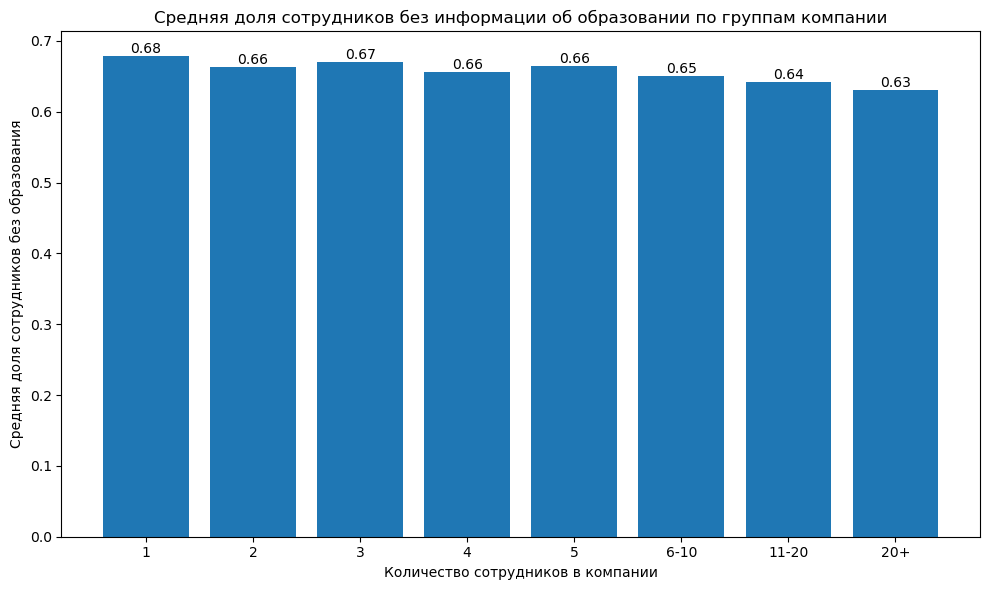

In [23]:
bins = [1, 2, 3, 4, 5, 6, 11, 21, float("inf")]
labels = ['1', '2', '3', '4', '5', '6-10', '11-20', '20+']
company_sizes_grouped = pd.cut(company_sizes['employee_count'], bins=bins, labels=labels, right=False)
people_education['company_size_group'] = company_sizes_grouped
people_education['missing_education'] = people_education['id_degree'].isna()
missing_education_rate = people_education.groupby('company_size_group',observed=True)['missing_education'].mean()
plt.figure(figsize=(10, 6))
baars = plt.bar(missing_education_rate.index, missing_education_rate.values)
plt.title('Средняя доля сотрудников без информации об образовании по группам компании')
plt.xlabel('Количество сотрудников в компании')
plt.ylabel('Средняя доля сотрудников без образования')
plt.tight_layout()
for bar in baars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, str(round(float(height),2)), ha='center', va='bottom')
plt.show()

<div style="background-color:lavender; color:#black; text-align:left; padding:2%">
    
#### **Комментарий:** При визуализации средней доли сотрудников без образования выбрал такие границы основываясь на количествах сотрудников в компаниях, которые указаны на графике выше, где отчетливо видно, что чаще всего в компаниях кол-во сотрудников не переваливает за 5 человек. Поэтому после 5 я решил сделать остальные части как интервал по кол-ву сотрудников.На графике видно, что самая крупная средняя доля без образования у компаний, в которых 1 сотрудник, она составляет 0.68. Самая меньшаяя доля у компаний, в которых 20+ сотрудников она равна 0.63. Присоединение таблицы degrees тут не нужно, так как можно и так выявить количество и процентное соотношение людей без образования, а если нужно было бы вывести информацию о количестве сотрудников с образованием, то эта таблица поможет получить более подробную информацию об образовании сотрудников

### 2.3. Объединять или не объединять — вот в чём вопрос

Некоторые названия столбцов встречаются в датасетах чаще других. И, например, в результате предварительной проверки датасетов было выяснено, что столбец `company_id` подходит для объединения данных, так как большая часть значений встречается в разных датасетах не один, а несколько раз. Этот столбец может быть использован для объединения данных.

* Установите, подходит ли для объединения данных столбец `network_username`, который встречается в нескольких датасетах. Нам необходимо понимать, дублируется ли для разных датасетов информация в столбцах с таким названием, и если да — то насколько часто.

* Оцените, можно ли использовать столбцы с именем `network_username` для объединения данных.

In [24]:
df = {'people': people, 'fund': fund, 'company_and_rounds': company_and_rounds}
for name, df in df.items():
    if 'network_username' in df.columns:
        print(f"Датасет: {name}")
        print(f"Всего строк: {len(df)}")
        print(f"Уникальных значений: {df['network_username'].nunique()}")
        print(f"Дубликаты (строки с повторяющимися network_username): {df.duplicated(subset=['network_username']).sum()}\n")
people_usernames = set(people['network_username'].dropna()) if 'network_username' in people else set()
fund_usernames = set(fund['network_username'].dropna()) if 'network_username' in fund else set()
company_and_rounds_usernames = set(company_and_rounds['network_username'].dropna()) if 'network_username' in company_and_rounds else set()  
print(f'Совпадений между people и fund: {len(people_usernames & fund_usernames)}')
print(f'Совпадений между people и company_and_rounds: {len(people_usernames & company_and_rounds_usernames)}')
print(f'Совпадений между fund и company_and_rounds: {len(fund_usernames & company_and_rounds_usernames)}')
print(f'Совпадений между fund и company_and_rounds и people_usernames: {len(fund_usernames & company_and_rounds_usernames & people_usernames)}')

Датасет: people
Всего строк: 226709
Уникальных значений: 38421
Дубликаты (строки с повторяющимися network_username): 188287

Датасет: fund
Всего строк: 11652
Уникальных значений: 2098
Дубликаты (строки с повторяющимися network_username): 9553

Датасет: company_and_rounds
Всего строк: 217774
Уникальных значений: 79571
Дубликаты (строки с повторяющимися network_username): 138202

Совпадений между people и fund: 79
Совпадений между people и company_and_rounds: 2199
Совпадений между fund и company_and_rounds: 70
Совпадений между fund и company_and_rounds и people_usernames: 7


<div style="background-color:lavender; color:#black; text-align:left; padding:2%">
    
#### **Комментарий:** Совпадений между 3 датасетами очень мало, всего 7 строк, поэтому объединение делать не стоит, так как потеряем больше кол-во данных


### 2.4. Проблемный датасет и причина возникновения пропусков

Во время собственного анализа данных у заказчика больше всего вопросов возникло к датасету `company_and_rounds.csv`. В нём много пропусков как раз в информации о раундах, которая заказчику важна. Хотя информация об общем объёме финансирования по раундам присутствует в других датасетах, заказчик считает данные `company_and_rounds.csv` о размере средств наиболее верными.

* Любым удобным способом приведите данные в вид, который позволяет проводить анализ в разрезе отдельных компаний. Можно изменять форму данных, порядок их хранения. Обратите внимание на структуру датасета, порядок и названия столбцов, проанализируйте значения.

По гипотезе заказчика данные по компаниям из этой таблицы раньше хранились иначе, более удобным для исследования образом.

* Максимальным образом сохраняя данные, сохранив их связность и исключив возможные возникающие при этом ошибки, подготовьте данные так, чтобы удобно было отобрать компании по параметрам и рассчитать показатели из расчёта на одну компанию.

In [25]:
company_and_rounds_cleaned = company_and_rounds.copy()
company_and_rounds_cleaned = company_and_rounds_cleaned[['company_ID','name','category_code','status','founded_at','closed_at',
                               'domain','network_username','country_code','investment_rounds','funding_rounds',
                               'funding_total','milestones']]
duplicate=company_and_rounds_cleaned.duplicated().sum()
pd.options.display.float_format = '{:,.0f}'.format
print(f'Кол-во дубликатов: {duplicate}')
print('Датасет до удаления дубликатов')
company_and_rounds_cleaned.info()
display(company_and_rounds_cleaned.head())
print('Датасет после удаления дубликатов')
company_and_rounds_cleaned = company_and_rounds_cleaned.drop_duplicates()
company_and_rounds_cleaned = company_and_rounds_cleaned.reset_index()
company_and_rounds_cleaned.drop(columns = ['index'], inplace = True)
company_and_rounds_cleaned.info()
display(company_and_rounds_cleaned.head())

Кол-во дубликатов: 21220
Датасет до удаления дубликатов
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   company_ID         217472 non-null  float32       
 1   name               217471 non-null  object        
 2   category_code      143886 non-null  object        
 3   status             217472 non-null  object        
 4   founded_at         109956 non-null  datetime64[ns]
 5   closed_at          3449 non-null    datetime64[ns]
 6   domain             147159 non-null  object        
 7   network_username   95534 non-null   object        
 8   country_code       108607 non-null  object        
 9   investment_rounds  217472 non-null  float32       
 10  funding_rounds     217472 non-null  float32       
 11  funding_total      217472 non-null  float32       
 12  milestones         217472 non-null  float32 

,company_ID,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones
0,1,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0,3,"39,750,000",5
1,1,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0,3,"39,750,000",5
2,1,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0,3,"39,750,000",5
3,10,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0,0,0,0
4,100,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0,0,0,4


Датасет после удаления дубликатов
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196554 entries, 0 to 196553
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   company_ID         196553 non-null  float32       
 1   name               196552 non-null  object        
 2   category_code      123186 non-null  object        
 3   status             196553 non-null  object        
 4   founded_at         91227 non-null   datetime64[ns]
 5   closed_at          2620 non-null    datetime64[ns]
 6   domain             126545 non-null  object        
 7   network_username   80591 non-null   object        
 8   country_code       87990 non-null   object        
 9   investment_rounds  196553 non-null  float32       
 10  funding_rounds     196553 non-null  float32       
 11  funding_total      196553 non-null  float32       
 12  milestones         196553 non-null  float32       
dtypes: datetim

,company_ID,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones
0,1,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0,3,"39,750,000",5
1,10,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0,0,0,0
2,100,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0,0,0,4
3,"10,000",MYWEBBO,network_hosting,operating,2008-07-26,NaT,mywebbo.com,NaN,NaN,0,0,0,0
4,"10,001",THE Movie Streamer,games_video,operating,2008-07-26,NaT,themoviestreamer.com,NaN,NaN,0,0,0,0


<div style="background-color:lavender; color:#black; text-align:left; padding:2%">
    
#### **Комментарий:** Выбрал такие столбцы для копии таблицы company_and_rounds потому что в них будет доступна основная информация о самих компаниях и о рауднах финансирования. Были удалены дубликаты, дабы информация о компаниях помещалась в одну строчку


## Шаг 3. Исследовательский анализ объединённых таблиц

<big>Приступите к шагу 3 после проверки ревьюера.</big>


### 3.1. Объединение данных

Объедините данные для ответа на вопросы заказчика, которые касаются интересующих его компаний.

В качестве основы для объединённой таблицы возьмите данные из обработанного датасета `company_and_rounds.csv` — выберите только те компании, у которых указаны значения `funding_rounds` или `investment_rounds` больше нуля, и те, у которых в колонке `status` указано `acquired`.

Далее работайте только с этими данными.

In [26]:
filtered_df = company_and_rounds_cleaned[
    ((company_and_rounds_cleaned["funding_rounds"] > 0) | (company_and_rounds_cleaned["investment_rounds"] > 0)) | 
    (company_and_rounds_cleaned["status"] == "acquired")
]
filtered_df.info()
display(filtered_df.head(5))

<class 'pandas.core.frame.DataFrame'>
Index: 40747 entries, 0 to 196552
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   company_ID         40747 non-null  float32       
 1   name               40747 non-null  object        
 2   category_code      35315 non-null  object        
 3   status             40747 non-null  object        
 4   founded_at         27807 non-null  datetime64[ns]
 5   closed_at          2128 non-null   datetime64[ns]
 6   domain             35754 non-null  object        
 7   network_username   20850 non-null  object        
 8   country_code       34742 non-null  object        
 9   investment_rounds  40747 non-null  float32       
 10  funding_rounds     40747 non-null  float32       
 11  funding_total      40747 non-null  float32       
 12  milestones         40747 non-null  float32       
dtypes: datetime64[ns](2), float32(5), object(6)
memory usage: 3.6+ MB

,company_ID,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones
0,1,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0,3,"39,750,000",5
1,10,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0,0,0,0
2,100,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0,0,0,4
13,"1,001",FriendFeed,web,acquired,2007-10-01,NaT,friendfeed.com,friendfeed,USA,0,1,"5,000,000",3
18,"10,014",Mobclix,mobile,acquired,2008-03-01,NaT,mobclix.com,mobclix,USA,0,1,0,4


<div style="background-color:lavender; color:#black; text-align:left; padding:2%">
    
#### **Комментарий:** Видим, что результатом выполнения стала таблица размером 40747 строк. В которой выделяется столбец closed_at своими пропусками, непустых значений всего 2128 из 40747 строк


### 3.2. Анализ выбросов

Заказчика интересует обычный для рассматриваемого периода размер средств, который предоставлялся компаниям.

* По предобработанному столбцу `funding_total` графическим способом оцените, какой размер общего финансирования для одной компании будет типичным, а какой — выбивающимся.

* В процессе расчёта значений обратите внимание, например, на показатели, возвращаемые методом `.describe()`, — объясните их. Применимы ли к таким данным обычные способы нахождения типичных значений?

In [27]:
funding_total = filtered_df['funding_total']
funding_total.describe()

count          40,747
mean       10,135,610
std        56,465,432
min                 0
25%                 0
50%           600,000
75%         5,650,650
max     5,699,999,744
Name: funding_total, dtype: float64

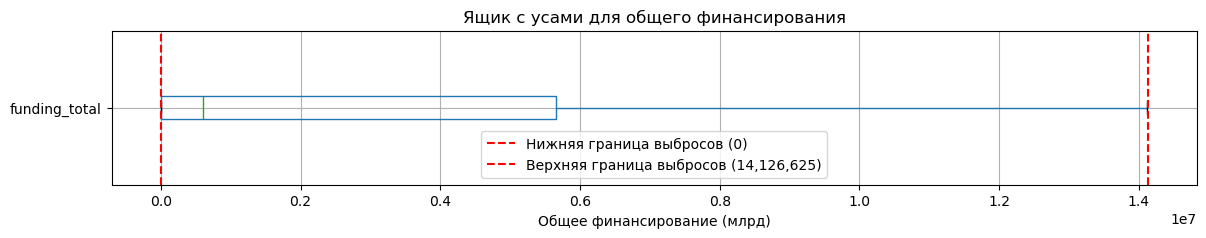

In [28]:
Q1 = filtered_df['funding_total'].quantile(0.25)
Q3 = filtered_df['funding_total'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = 0
upper_bound = Q3 + 1.5 * IQR
plt.figure(figsize=(14, 2))
filtered_df.boxplot(column='funding_total',vert = False,showfliers=False)
plt.title("Ящик с усами для общего финансирования")
plt.xlabel("Общее финансирование (млрд)")
plt.axvline(x=lower_bound, color='r', linestyle='--', label=f'Нижняя граница выбросов ({lower_bound:,.0f})')
plt.axvline(x=upper_bound, color='r', linestyle='--', label=f'Верхняя граница выбросов ({upper_bound:,.0f})')
plt.legend()
plt.show()

<div style="background-color:lavender; color:#black; text-align:left; padding:2%">
    
#### **Комментарий:** Тут мы видим, что среднее значение mean искажено выброрсами, а выбросами будут считаться значения больше  2 млрд. Со стандратным отклонением похожая история, оно велико из-за крупных выбросов. Значеие min и 25% говорит нам, о том, чо 25 процентов компаний имеют финансирование равное 0. Начиная с медианы, со значения 50% мы видим значение 600000. Оно нам говорит, что половина компаний имеет финансирование менее 600000. 75% значения значительно отличающее от медианы, оно равно   5650650, это означает, что 75% компаний получили финансирование на сумму менее 5.65 млн. Максимальное значение очевидно является выбросом, так как его значение составляет почти 5.7 млрд. К типичным значениям можно отнести медиану (50%) и межквартильный размах (между 25% и 75%). Выбивающиеся значения  - это экстремально большие суммы финансирования, которые соответствуют выбросам, и их влияние на среднее значение сильно искажает представление о типичных размерах. Сильную разницу между медианой и средним можно объяснить тем, что на среднее крупные выбросы сильно искажают значение, и на него не стоит ориентироваться, а медиана даже в случае наличия выбросов, она не так сильно чувствительна к ним, поэтому медиану можно использовать для поиска типичных значений


### 3.3. Куплены забесплатно?

* Исследуйте компании, которые были проданы за ноль или за один доллар, и при этом известно, что у них был ненулевой общий объём финансирования.

* Рассчитайте аналитически верхнюю и нижнюю границу выбросов для столбца `funding_total` и укажите, каким процентилям границы соответствуют. Учитывая озвученные выше предпосылки и собственные соображения, сделайте выводы о корректности планируемой заказчиком замены нижней и верхней границы выбросов на значения, рассчитанные по процентилям.

In [29]:
new_df = filtered_df.merge(acquisition, left_on='company_ID', right_on='acquired_company_id', how='left')
duplic=new_df.duplicated().sum()
dupliccc = new_df.duplicated(subset = ['company_ID']).sum()
print(f'Кол-во явных дубликатов: {duplic}')
print(f'Кол-во неявных дубликатов: {dupliccc}')
print('\nДатасет до удаления дубликатов и сортировки по условию')
new_df.info()
new_df = new_df.drop_duplicates()
new_df = new_df.drop_duplicates(subset = ['company_ID'],keep ='first')
neww_df = new_df[
    ((new_df["price_amount"] == 0) | (new_df["price_amount"] == 1)) &
    (new_df["funding_total"] > 0)
]
print('\nДатасет после удаления дубликатов и сортировки по условию')
neww_df.info()

Кол-во явных дубликатов: 0
Кол-во неявных дубликатов: 143

Датасет до удаления дубликатов и сортировки по условию
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40890 entries, 0 to 40889
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   company_ID            40890 non-null  float32       
 1   name                  40890 non-null  object        
 2   category_code         35436 non-null  object        
 3   status                40890 non-null  object        
 4   founded_at            27911 non-null  datetime64[ns]
 5   closed_at             2128 non-null   datetime64[ns]
 6   domain                35883 non-null  object        
 7   network_username      20938 non-null  object        
 8   country_code          34858 non-null  object        
 9   investment_rounds     40890 non-null  float32       
 10  funding_rounds        40890 non-null  float32       
 11  funding_total     

<div style="background-color:lavender; color:#black; text-align:left; padding:2%">
    
#### **Комментарий:** Тут присоединили датасет acquisition по столюцу покупаемой компании, мы видели, что в результат объединения, добавилось всего 143 строки, которые в последствии оказались неявными дубликатами, поэтому мы их удалили и применили условие, которое давалось выше, получился датасет всегов  1593 строки, со всеми выполненными условиями. Можно все так же подметить столбец closed_at, в нем всего 13 значений

In [30]:
Q1 = filtered_df["funding_total"].quantile(0.25)
Q3 = filtered_df["funding_total"].quantile(0.75)
Q4 = filtered_df["funding_total"].quantile(0.90)
Q5 = filtered_df["funding_total"].quantile(0.95)
Q6 = filtered_df["funding_total"].quantile(0.99)
IQR = Q3 - Q1
lower_bound = max(lower_bound, 0)
upper_bound = Q3 + 1.5 * IQR

print(f"Нижняя граница выбросов: {round(lower_bound,2)}")
print(f"Верхняя граница выбросов(IQR): {round(upper_bound,2)}")
print(f"Верхняя граница выбросов(90%): {round(Q4,2)}")
print(f"Верхняя граница выбросов(95%): {round(Q5,2)}")
print(f"Верхняя граница выбросов(99%): {round(Q6,2)}")


Нижняя граница выбросов: 0
Верхняя граница выбросов(IQR): 14126625.0
Верхняя граница выбросов(90%): 22391380.0
Верхняя граница выбросов(95%): 43500000.0
Верхняя граница выбросов(99%): 133948660.0


<div style="background-color:lavender; color:#black; text-align:left; padding:2%">
    
#### **Комментарий:** Выше мы выяснили, что минимальным значением является 0, поэтому тут не нужно вести какой-либо подсчет. Замена нижней границы не нужна, так как 0 является нормой. Использование IQR для верхней границы выбросов, так как это соответсвует значению, выше которго начинаются редкие или крупные инвестиции. При этом использование 90-го процентиля или 95-го процентиля может быть более подходящим для фильтрации крупных выбросов, не исключая слишком много данных с реальными крупными инвестициями.99-й процентиль — это уже редкие, возможно, исключительные случаи, и решение о замене таких значений стоит принимать с осторожностью. Так что, если нам нужно анализировать типичные значения, то надо использовать IQR. Если захотеть минимализировать влияние болших выбросов, то можно использовать 90-ый процентиль. А если надо заменить выбросы на значения, тоесть исключить редкие случаи (типо единичных сделок на миллиард), то стоит использовать 95 или 99 процентиль.


### 3.4. Цены стартапов по категориям

Категории стартапов с наибольшими ценами и значительным разбросом цен могут быть наиболее привлекательными для крупных инвесторов, которые готовы к высоким рискам ради потенциально больших доходов. Среди категорий стартапов выделите категории стартапов, характеризующиеся:

* наибольшими ценами;
* и наибольшим разбросом цен за стартап.

Объясните, почему решили составить топ именно из такого числа категорий и почему рассчитывали именно так.

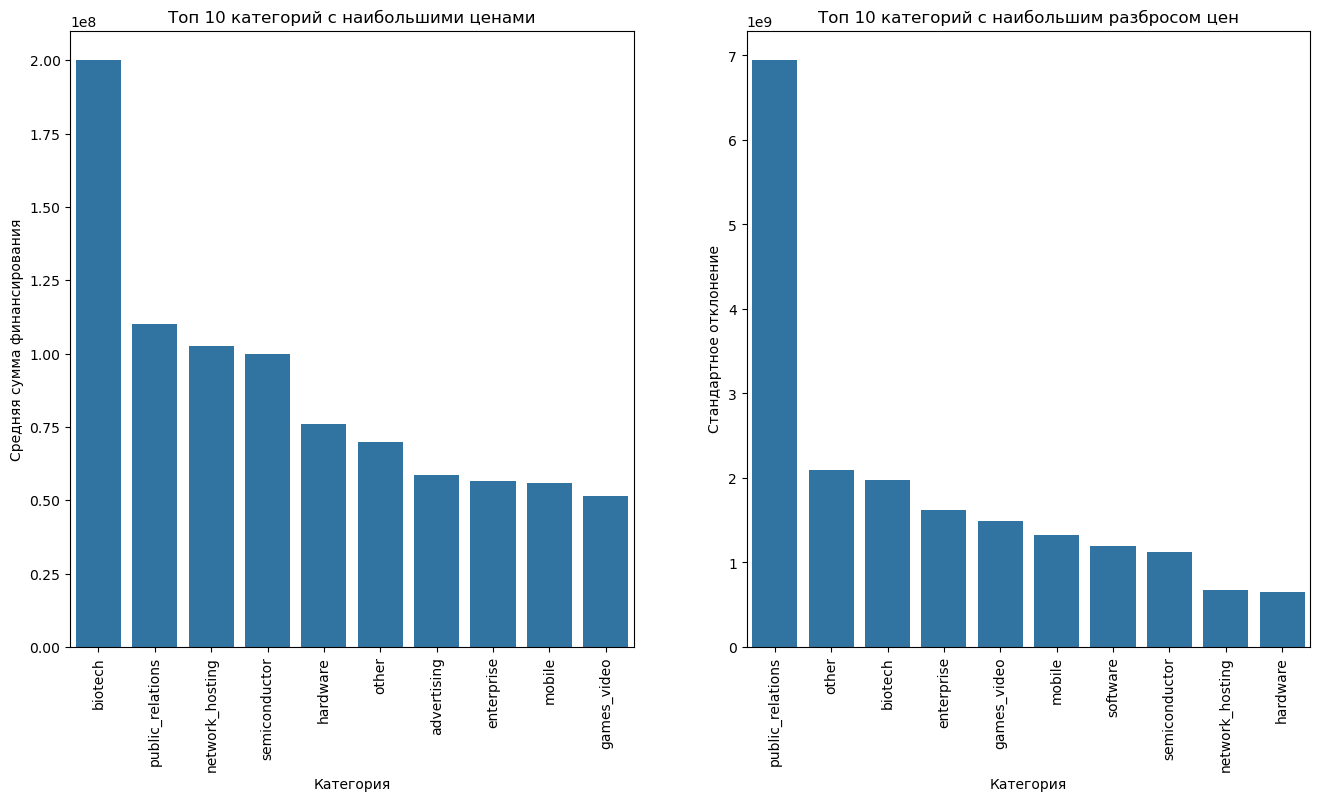

Топ категорий с наибольшими ценами:
                  company_count  median_price     std_price
category_code                                              
biotech                     262   200,000,000 1,971,954,950
public_relations             72   110,000,000 6,944,050,971
network_hosting              64   102,500,000   676,956,798
semiconductor                71   100,000,000 1,122,024,808
hardware                     78    76,000,000   645,087,366
other                        81    70,000,000 2,097,598,454
advertising                  82    58,500,000   491,459,531
enterprise                  113    56,500,000 1,614,921,635
mobile                      117    56,000,000 1,319,471,637
games_video                  85    51,500,000 1,487,437,889

Топ категорий с наибольшим разбросом цен:
                  company_count  median_price     std_price
category_code                                              
public_relations             72   110,000,000 6,944,050,971
other                

In [31]:
new_filtered_df = filtered_df.merge(acquisition, left_on='company_ID', right_on='acquired_company_id', how='left')
new_filtered_df = new_filtered_df.drop_duplicates(subset = ['company_ID'],keep ='first')
new_filtered_df = new_filtered_df[new_filtered_df['price_amount']>0]
category_stats = new_filtered_df.groupby('category_code')['price_amount'].agg(
    company_count = 'count',
    median_price ='median',
    std_price ='std'
)
category_stats = category_stats[category_stats['company_count'] > 50]
top_categories_by_mean = category_stats.sort_values(by='median_price', ascending=False).head(10)
top_categories_by_std = category_stats.sort_values(by='std_price', ascending=False).head(10)

fig, axes = plt.subplots(1, 2, figsize=(16, 8))
sns.barplot(x=top_categories_by_mean.index, y=top_categories_by_mean['median_price'], ax=axes[0])
axes[0].set_title('Топ 10 категорий с наибольшими ценами')
axes[0].set_xlabel('Категория')
axes[0].set_ylabel('Средняя сумма финансирования')

sns.barplot(x=top_categories_by_std.index, y=top_categories_by_std['std_price'], ax=axes[1])
axes[1].set_title('Топ 10 категорий с наибольшим разбросом цен')
axes[1].set_xlabel('Категория')
axes[1].set_ylabel('Стандартное отклонение')

for ax in axes:
    ax.set_xticks(range(len(ax.get_xticklabels())))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

print("Топ категорий с наибольшими ценами:")
print(top_categories_by_mean)
print("\nТоп категорий с наибольшим разбросом цен:")
print(top_categories_by_std)

<div style="background-color:lavender; color:#black; text-align:left; padding:2%">
    
#### **Комментарий:** На графиках можно увидеть категории стартапов с наибольшими инвестициями и с наибольшим разбросом. Это позволит определить, какие области требуют более тщательного анализа при принятии решений о крупных инвестициях. График для средней цены покажет, какие категории стартапов в среднем получают наибольшее сумму денег.График для стандартного отклонения покажет, в каких категориях разброс сумм инвестиций наиболее велик, что может свидетельствовать о рисках для инвесторов. Оценка топ-10 категорий помогает сосредоточиться на наиболее значимых данных, которые дают четкое представление о перспективных секторах для инвестировани


### 3.5. Сколько раундов продержится стартап перед покупкой

* Необходимо проанализировать столбец `funding_rounds`. Исследуйте значения столбца. Заказчика интересует типичное значение количества раундов для каждого возможного статуса стартапа.

* Постройте график, который отображает, сколько в среднем раундов финансирования проходило для стартапов из каждой группы. Сделайте выводы.

Уникальные значения столбца 'funding_rounds':
[ 3.  0.  1.  5.  2.  7.  4.  6.  8. 10.  9. 13. 11. 15. 14. 12.]

Статистика по столбцу 'funding_rounds':
count   40,747
mean         1
std          1
min          0
25%          1
50%          1
75%          2
max         15
Name: funding_rounds, dtype: float64


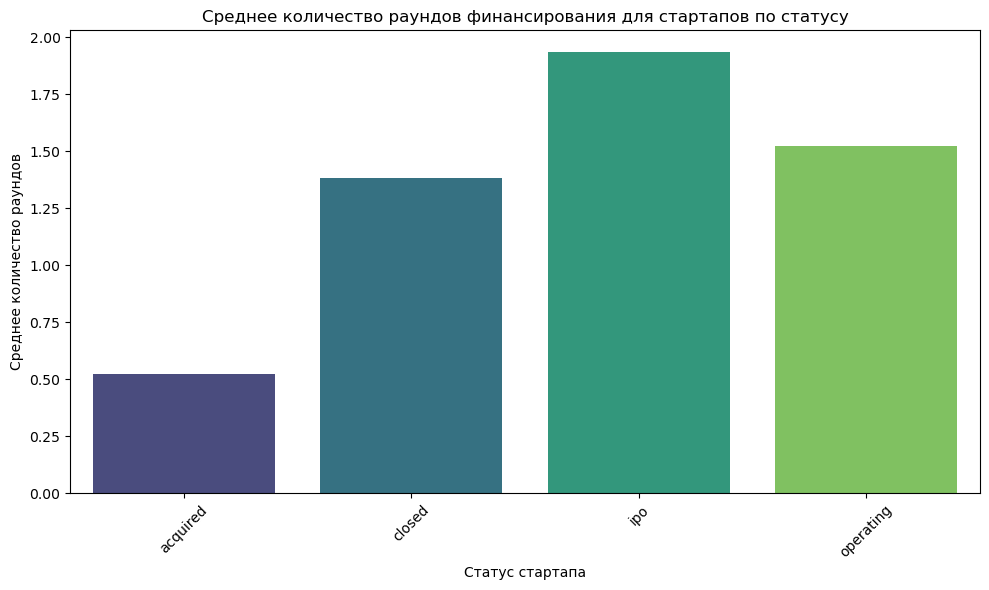

In [32]:
print("Уникальные значения столбца 'funding_rounds':")
print(filtered_df['funding_rounds'].unique())
print("\nСтатистика по столбцу 'funding_rounds':")
print(filtered_df['funding_rounds'].describe())
status_rounds = filtered_df.groupby('status')['funding_rounds'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='status', y='funding_rounds', data=status_rounds,hue = 'status', palette='viridis')
plt.title('Среднее количество раундов финансирования для стартапов по статусу')
plt.xlabel('Статус стартапа')
plt.ylabel('Среднее количество раундов')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<div style="background-color:lavender; color:#black; text-align:left; padding:2%">
    
#### **Комментарий:** Закрытые (closed) и приобретённые (acquired) стартапы обычно имеют меньшее количество раундов финансирования, что связано с завершением их жизненного цикла или поглощением более крупными компаниями. Стартапы на стадии IPO имеют наибольшее среднее количество раундов финансирования, что логично, учитывая сложность и долгий процесс подготовки к публичному размещению. Стартапы с текущим статусом актвные (operating) также привлекают значительные суммы через несколько раундов.


## Шаг 4. Итоговый вывод и рекомендации

По мери выполнения проекта было создано несколько доп. датасетов, которые нужны были для расчета нужной информации. Были обратотаны начальные таблицы, в некоторых столбцах изменил тип данных у чсиловых, дабы датасеты занимали меньше места, были также изменены типы данных в столбцах с датой. Так же было выявлено количество и процентное соотношение пропусков в каждом из датасетов. Производился просмотр количества сотрудников в компаниях и их образования, анализ дубликатов в разных датасетах и обработка датасета company_and_rounds, который включал себя большое кол-во информации. Были выявлены выбросы, так же узнали, сколько компаний было продано за 0 или за 1 доллар. Были найдены нижние и верхние границы выбросов, описывая какая из границ подойдет для решения нужной задачи. Мы увидели топ10 категорий с наибольшей ценой и наибольшим разбросом цен. И последнее что было сделано - это графически было показано, сколько в среднем требуется раундов финансирования для каждого из статусов.
Рекомендация будет такая, категория biotech является самой дорогой по цене, но и риск потери средств достаточно велик, хотя если говорить про 2 ближайшие категории, то та, которая занимает 2 место - public_relations, ее риск потерь больше biotech в 2.5 раза, а вот следующая категория network_hosting имеет в 1.5 раза меньше риск потери, но и в 2 раза меньше цена. Хотите рискнуть? то выбирайте стартап категории biotech или public_relations, если хотите меньше рисков и больше финансирования, то выбирайте стартап категории nnetwork_hosting.